---
# Section 2.2: Condition Numbers
---

Let $A$ be a nonsingular matrix, and suppose we solve $Ax = b$:

$$
\begin{bmatrix}
a_1^T \\
a_2^T \\
\end{bmatrix}
x = 
\begin{bmatrix}
b_1 \\
b_2 \\
\end{bmatrix}
$$

Due to errors in the data and in the computation using finite precision, we get a solution $\hat{x}$ that satisfies $A \hat{x} = b + \delta b$ instead:

$$
\begin{bmatrix}
a_1^T \\
a_2^T \\
\end{bmatrix}
\hat{x} = 
\begin{bmatrix}
b_1 + \delta b_1 \\
b_2 + \delta b_2 \\
\end{bmatrix}
$$


---

In [ ]:
# You may need to run this command to use PyPlot

#Pkg.add("PyPlot")

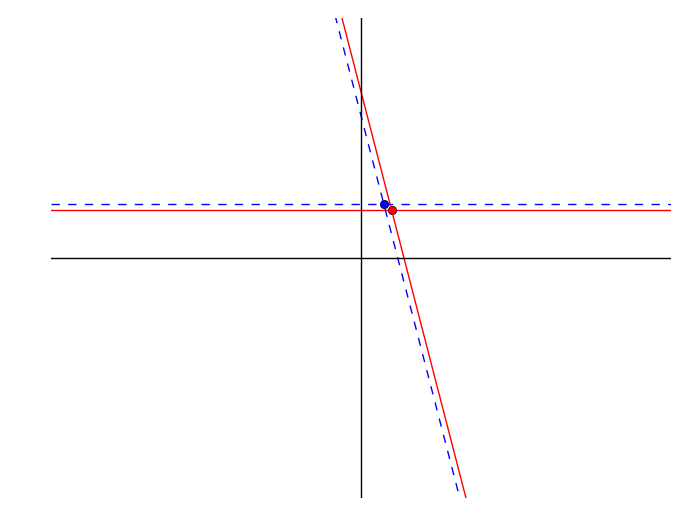

norm(δb) = 1.0307764064044151
norm(xhat - xtrue) = 0.3535533905932738


In [2]:
using PyPlot

x = linspace(-10, 10, 1000)

A = [5 1; 0 1]
xtrue = [1, 2]
b = A*xtrue

δb = [-1, .25]

bhat = b + δb
xhat = A\bhat

@show norm(δb)
@show norm(xhat - xtrue)

plot(xtrue[1], xtrue[2], "ro")
for i = 1:2
    plot(x, (b[i] - A[i,1]*x)/A[i,2], "r")
end

plot(xhat[1], xhat[2], "bo")
for i = 1:2
    plot(x, (bhat[i] - A[i,1]*x)/A[i,2], "b--")
end

plot([-10, 10], [0, 0], "k")
plot([0, 0], [-10, 10], "k")

ylim([-10, 10])

axis("off");

In this case, a small $\delta b$ resulted in $\hat{x} \approx x$.  That is,

$$
\lVert \delta b \rVert \text{ small} \quad \implies \quad \lVert \delta x \rVert = \lVert \hat{x} - x \rVert \text{ small}.
$$

When this happens, we say that the matrix $A$ is **well-conditioned**.

---

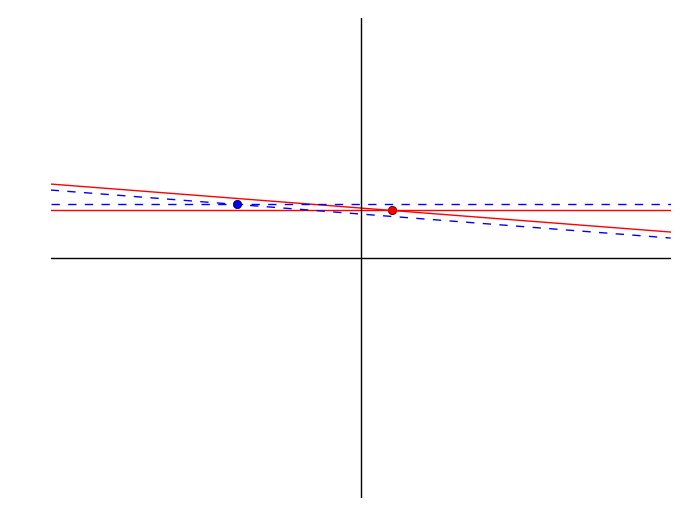

norm(δb) = 0.3535533905932738
norm(xhat - xtrue) = 5.006246098625196


In [1]:
using PyPlot

x = linspace(-10, 10, 1000)

A = [.1 1; 0 1]
xtrue = [1, 2]
b = A*xtrue

δb = [-.25, .25]

bhat = b + δb
xhat = A\bhat

@show norm(δb)
@show norm(xhat - xtrue)

plot(xtrue[1], xtrue[2], "ro")
for i = 1:2
    plot(x, (b[i] - A[i,1]*x)/A[i,2], "r")
end

plot(xhat[1], xhat[2], "bo")
for i = 1:2
    plot(x, (bhat[i] - A[i,1]*x)/A[i,2], "b--")
end

plot([-10, 10], [0, 0], "k")
plot([0, 0], [-10, 10], "k")

ylim([-10, 10])

axis("off");

This time, even though $\lVert \delta b \rVert$ was small, we got a large error $\lVert \delta x \rVert = \lVert \hat{x} - x \rVert$.

When this happens, we say that the matrix $A$ is **ill-conditioned**.

---

## The condition number of $A$

We want to estimate the **relative error** in computing $x$,

$$
\frac{\lVert \delta x \rVert}{\lVert x \rVert},
$$

in terms of the **relative error** in $b$,

$$
\frac{\lVert \delta b \rVert}{\lVert b \rVert},
$$

where

$$
Ax = b \qquad \text{and} \qquad A(x + \delta x) = b + \delta b.
$$

First note that $A \delta x = \delta b$, so we have

$$
\delta x = A^{-1} \delta b.
$$

Therefore,

$$
\lVert \delta x \rVert = \lVert A^{-1} \delta b \rVert \leq 
\lVert A^{-1} \rVert \lVert \delta b \rVert.
$$

Also, $Ax = b$ implies that

$$
\lVert b \rVert = \lVert Ax \rVert \leq \lVert A \rVert \lVert x \rVert.
$$



Thus,

$$
\begin{align}
\frac{\lVert \delta x \rVert}{\lVert x \rVert}
&= \frac{1}{\lVert x \rVert} \lVert \delta x \rVert \\
&\leq \frac{\lVert A \rVert}{\lVert b \rVert} \lVert A^{-1} \rVert \lVert \delta b \rVert \\
&= \lVert A \rVert \lVert A^{-1} \rVert \frac{\lVert \delta b \rVert}{\lVert b \rVert}. \\
\end{align}
$$

This tells us that if the relative error in $b$ is small, then the relative error in $x$ will be small (as long as $\lVert A \rVert \lVert A^{-1} \rVert$ is small).

This key quantity of $\lVert A \rVert \lVert A^{-1} \rVert$ is called the **condition number** of $A$:

$$
\kappa(A) = \lVert A \rVert \lVert A^{-1} \rVert.
$$

> ### Theorem: (Relative error bound I)
> 
Let $A$ be nonsingular, $b \neq 0$, and $Ax = b$. If 
>
$$A(x + \delta x) = b + \delta b,$$
>
then
>
$$
\frac{\lVert \delta x \rVert}{\lVert x \rVert}
\leq \kappa(A) \frac{\lVert \delta b \rVert}{\lVert b \rVert}.
$$


If $\kappa(A)$ is **small**, then

$$
\frac{\lVert \delta b \rVert}{\lVert b \rVert} \text{ small} \quad \implies \quad \frac{\lVert \delta x \rVert}{\lVert x \rVert} \text{ small},
$$

so $A$ is **well-conditioned**.


If $\kappa(A)$ is **large**, then it is possible to have 

$$
\frac{\lVert \delta b \rVert}{\lVert b \rVert} \text{ small} \quad \text{and} \quad \frac{\lVert \delta x \rVert}{\lVert x \rVert} \text{ large},
$$

so $A$ is **badly conditioned**.

---

## `cond`

In [2]:
?cond

search: cond Conda condskeel Condition contour3D contourf3D macroexpand



```
cond(M, [p])
```

Condition number of the matrix `M`, computed using the operator `p`-norm. Valid values for `p` are `1`, `2` (default), or `Inf`.


In [3]:
# The well-conditioned A
A = [5 1; 0 1]
cond(A)

5.20798724079689

In [4]:
norm(A)*norm(inv(A))

5.20798724079689

In [5]:
# The ill-conditioned A
A = [.1 1; 0 1]
cond(A)

20.050124999218763

---

## An extreme example

$$
A = 
\begin{bmatrix}
1000 & 999 \\
999 & 998 \\
\end{bmatrix},
\qquad
A^{-1} = 
\begin{bmatrix}
-998 & 999 \\
999 & -1000 \\
\end{bmatrix}
$$

In [6]:
A = [1000 999; 999 998]

2x2 Array{Int64,2}:
 1000  999
  999  998

In [7]:
det(A)

-0.9999999999763531

In [8]:
cond(A)

3.9920059997083056e6

Thus,

$$
\kappa(A) \approx 4 \times 10^6.
$$

This is a very ill-conditioned matrix.

In [9]:
x = [1; 1]
b = A*x

2-element Array{Int64,1}:
 1999
 1997

In [10]:
δb = [-1; 1]
xhat = A\(b + δb)

2-element Array{Float64,1}:
  1998.0
 -1998.0

In [11]:
δx = xhat - x

2-element Array{Float64,1}:
  1997.0
 -1999.0

In [12]:
norm(δb)/norm(b)

0.0005005004378126367

In [13]:
norm(δx)/norm(x)

1998.0002502975044

So we see that the relative error in $b$ is very small, but the relative error in $x$ is very large.

**Note**:

The worst-case scenario is always possible. We just choose $x$ such that

$$
\frac{\lVert Ax \rVert}{\lVert x \rVert} = 
\max_{y \neq 0} \frac{\lVert Ay \rVert}{\lVert y \rVert} = \lVert A \rVert,
$$

and choose $\delta b$ such that

$$
\frac{\lVert A^{-1}\delta b \rVert}{\lVert \delta b \rVert} = 
\max_{y \neq 0} \frac{\lVert A^{-1}y \rVert}{\lVert y \rVert} = \lVert A^{-1} \rVert.
$$

Then let $b = Ax$ and $\delta x = A^{-1} \delta b$, and we obtain

$$
\frac{\lVert \delta x \rVert}{\lVert x \rVert}
= \kappa(A) \frac{\lVert \delta b \rVert}{\lVert b \rVert}.
$$


---